# Assignment 3(due on 11/22)

## Student:教明明（12332328），Gtihub：sustechjiao
## 批改人：张鹏


## 得分：54/60

In [1]:
import pandas as pd
import numpy as np 
import netCDF4
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Niño 3.4 index

In [4]:
ds = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [5]:
ds.info()

xarray.Dataset {
dimensions:
	lat = 89 ;
	lon = 180 ;
	time = 684 ;

variables:
	float32 lat(lat) ;
		lat:standard_name = latitude ;
		lat:pointwidth = 2.0 ;
		lat:gridtype = 0 ;
		lat:units = degree_north ;
	float32 lon(lon) ;
		lon:standard_name = longitude ;
		lon:pointwidth = 2.0 ;
		lon:gridtype = 1 ;
		lon:units = degree_east ;
	float32 sst(time, lat, lon) ;
		sst:pointwidth = 1.0 ;
		sst:valid_min = -3.0 ;
		sst:valid_max = 45.0 ;
		sst:units = degree_Celsius ;
		sst:long_name = Extended reconstructed sea surface temperature ;
		sst:standard_name = sea_surface_temperature ;
		sst:iridl:hasSemantics = iridl:SeaSurfaceTemperature ;
	datetime64[ns] time(time) ;

// global attributes:
	:Conventions = IRIDL ;
	:source = https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/.version3b/.sst/ ;
	:history = extracted and cleaned by Ryan Abernathey for Research Computing in Earth Science ;
}

In [6]:
ds.sst.groupby('time.month')

DataArrayGroupBy, grouped over 'month'
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

In [7]:
tas_clim = ds.sst.groupby('time.month').mean()
tas_clim

<xarray.DataArray 'sst' (month: 12, lat: 89, lon: 180)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.7995003, -1.7995191, -1.799739 , ..., -1.7999376,
         -1.7998039, -1.7997435],
        [-1.8000008, -1.8000008, -1.7999679, ..., -1.8000008,
         -1.7999806, -1.7999876],
        [-1.8000008, -1.8000008, -1.8000008, ..., -1.8000008,
         -1.8000008, -1.8000008]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [-1.7988412, -1.7981389, -1.7975631, ..., -1.7999879,
         -1.7997359, -1.7993975],
        [-1.7984648, -1.7981449, -1.7979035, ..., -1.7993721,
         -1.7989964, -1.7987365],
        [-1.7991711, -1.799057 , -1.7989912, ..., -1.7994182,
         -1.7993084, -1.7992215]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.798874 , -1.7986898, -1.7985635, ..., -1.7997319,
         -1.7994511, -1.7991848],
        [-1.7992741, -1.7991948, -1.7991776, ..., -1.7995594,
         -1.7994516, -1.7993505],
        [-1.7995965, -1.7995497, -1.7995318, ..., -1.79972  ,
         -1.799665 , -1.7996197]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    pointwidth:          1.0
    valid_min:           -3.0
    valid_max:           45.0
    units:               degree_Celsius
    long_name:           Extended reconstructed sea surface temperature
    standard_name:       sea_surface_temperature
    iridl:hasSemantics:  iridl:SeaSurfaceTemperature

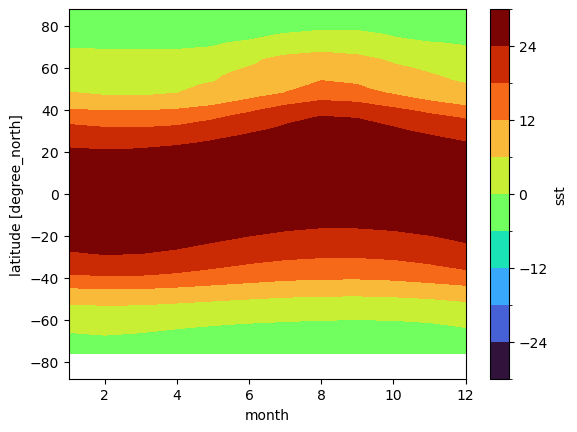

In [8]:
tas_clim.mean(dim='lon').transpose().plot.contourf(levels=12, robust=True, cmap='turbo')

In [9]:
group_data = ds.sst.groupby('time.month')

In [10]:
tas_anom = group_data - group_data.mean(dim='time')
tas_anom2=tas_anom.sel(lon=slice(190, 240), lat=slice(-5, 5))
tas_anom2

<xarray.DataArray 'sst' (time: 684, lat: 5, lon: 26)>
array([[[-0.43157768, -0.41846275, -0.39795303, ..., -0.2116642 ,
         -0.23776245, -0.24401474],
        [-0.41259003, -0.4067192 , -0.3875141 , ..., -0.52064896,
         -0.5346451 , -0.51997185],
        [-0.40932274, -0.39743805, -0.36237717, ..., -0.6373882 ,
         -0.6171951 , -0.583725  ],
        [-0.4140854 , -0.37909317, -0.3215618 , ..., -0.43292618,
         -0.38404274, -0.3352623 ],
        [-0.5043678 , -0.43894005, -0.3710251 , ..., -0.17453575,
         -0.11044502, -0.06918144]],

       [[-0.5374584 , -0.52739716, -0.50823593, ..., -0.40254593,
         -0.44382668, -0.45287704],
        [-0.55093956, -0.539135  , -0.51673317, ..., -0.6660595 ,
         -0.7127285 , -0.710968  ],
        [-0.61242104, -0.5959244 , -0.5572338 , ..., -0.7235069 ,
         -0.7326374 , -0.73106194],
        [-0.6798363 , -0.6483364 , -0.5889931 , ..., -0.5397434 ,
         -0.50793266, -0.49977684],
        [-0.7830448 , -0.7286701 , -0.6683655 , ..., -0.33967972,
...
         -0.2555828 , -0.13972664],
        [-0.989378  , -1.0497723 , -1.0954857 , ..., -0.86087227,
         -0.7690697 , -0.65498734],
        [-1.1887245 , -1.252285  , -1.3029232 , ..., -1.0460625 ,
         -0.9661274 , -0.8785801 ],
        [-1.002367  , -1.0756893 , -1.1325111 , ..., -0.7207298 ,
         -0.6597252 , -0.5900669 ],
        [-0.5770798 , -0.65514374, -0.72174263, ..., -0.4353485 ,
         -0.36265945, -0.28103828]],

       [[-0.3578701 , -0.41542053, -0.47110367, ..., -0.2400589 ,
         -0.1464405 , -0.03788376],
        [-0.7678585 , -0.83501625, -0.9024124 , ..., -0.727829  ,
         -0.61603355, -0.48027992],
        [-0.96187973, -1.0445309 , -1.1224213 , ..., -0.9327831 ,
         -0.81235695, -0.6655674 ],
        [-0.82112694, -0.9206734 , -1.0085506 , ..., -0.6531601 ,
         -0.5626869 , -0.4374504 ],
        [-0.4864292 , -0.5823746 , -0.6702862 , ..., -0.36221695,
         -0.30041504, -0.1987915 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

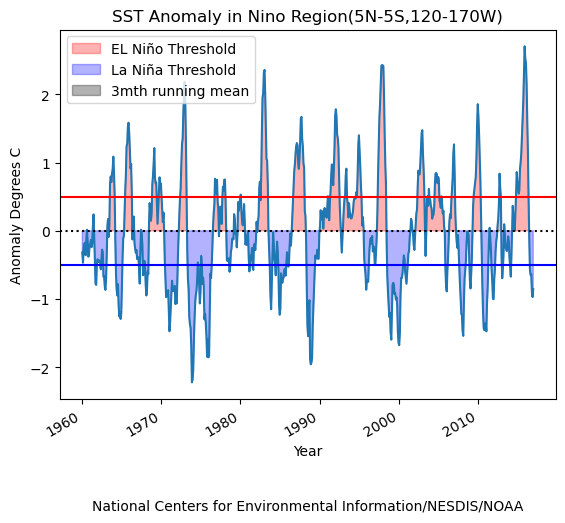

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
global_mean_anomaly = tas_anom2.mean(dim=['lat', 'lon'])
global_mean_anomaly.plot()
plt.xlabel('Year')
plt.ylabel('Anomaly Degrees C')
plt.title('SST Anomaly in Nino Region(5N-5S,120-170W)')
plt.fill_between(global_mean_anomaly.time, global_mean_anomaly, where=(global_mean_anomaly >= 0),
                 interpolate=True, color='red', alpha=0.3, label='Above 0.0')
plt.fill_between(global_mean_anomaly.time, global_mean_anomaly, where=(global_mean_anomaly < 0),
                 interpolate=True, color='blue', alpha=0.3, label='Below 0.0')
el_nino_patch = mpatches.Patch(color='red', alpha=0.3, label='EL Niño Threshold')
la_nina_patch = mpatches.Patch(color='blue', alpha=0.3, label='La Niña Threshold')
new_patch = mpatches.Patch(color='black', alpha=0.3, label='3mth running mean')

plt.legend(handles=[el_nino_patch, la_nina_patch, new_patch])
plt.text(0.5, -0.3, 'National Centers for Environmental Information/NESDIS/NOAA', transform=plt.gca().transAxes, ha='center')
#助教添加
plt.axhline(y=0.5,ls="-",c="red")#添加水平直线
plt.axhline(y=0,ls=":",c="black")#添加水平直线
plt.axhline(y=-0.5,ls="-",c="blue")#添加水平直线
plt.show()

### 第一题代码运行正常，可以输出正确结果，报告中也展示了输出内容和详细的结果的分析。但第二问画图没有添加水平线，且没有对数据tas_anom2进行三个月滑动平均值处理

### 得分：18/20
### --------------------------------------------------------------------------------------------

## 2. Earth’s energy budget

# 作业二

In [3]:
import pandas as pd
import numpy as np 
import netCDF4
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
ds = xr.open_dataset(r"../CERES_EBAF-TOA_200003-201701.nc", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

In [7]:
ds.head()

<xarray.Dataset>
Dimensions:                      (lon: 5, time: 5, lat: 5)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 3.5 4.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2000-07-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

In [8]:
variable_names = list(ds.variables.keys())

In [9]:
print("Variable names in the NetCDF file:")
for var_name in variable_names:
    print(var_name)

Variable names in the NetCDF file:
lon
toa_sw_all_mon
toa_lw_all_mon
toa_net_all_mon
toa_sw_clr_mon
toa_lw_clr_mon
toa_net_clr_mon
toa_cre_sw_mon
toa_cre_lw_mon
toa_cre_net_mon
solar_mon
cldarea_total_daynight_mon
cldpress_total_daynight_mon
cldtemp_total_daynight_mon
cldtau_total_day_mon
time
lat


In [14]:
mean_data=ds.mean(dim='time')

In [15]:
lon = mean_data['lon']
lat = mean_data['lat']
variable_a = mean_data['toa_lw_all_mon']
variable_b = mean_data['toa_sw_all_mon']
variable_c = mean_data['solar_mon']

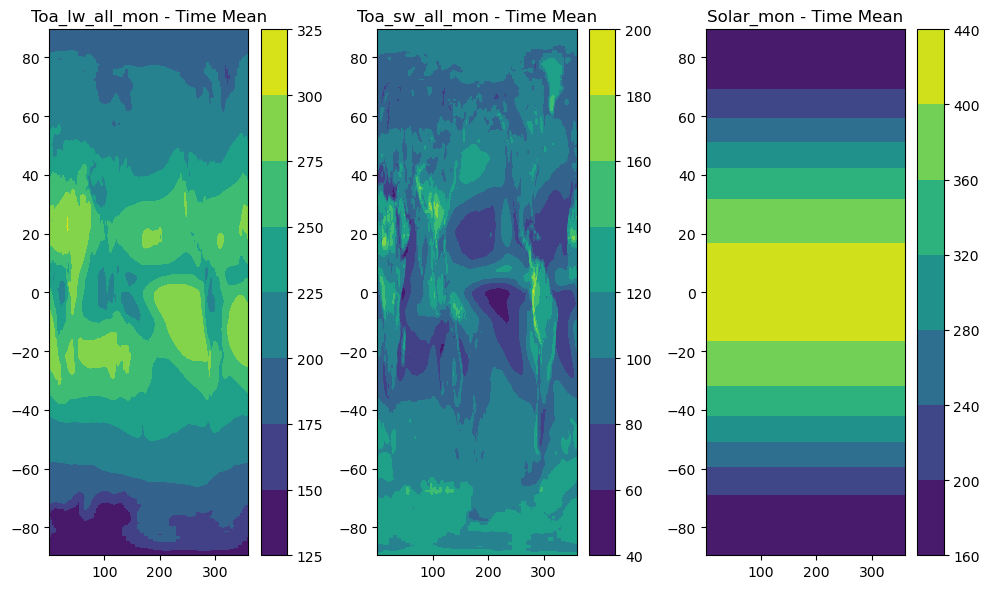

In [16]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.contourf(lon, lat, variable_a, cmap='viridis')
plt.colorbar()
plt.title('Toa_lw_all_mon - Time Mean')

plt.subplot(1, 3, 2)
plt.contourf(lon, lat, variable_b, cmap='viridis')
plt.colorbar()
plt.title('Toa_sw_all_mon - Time Mean')

plt.subplot(1, 3, 3)
plt.contourf(lon, lat, variable_c, cmap='viridis')
plt.colorbar()
plt.title('Solar_mon - Time Mean')


plt.tight_layout()
plt.show()

In [17]:
variable_a = ds['toa_lw_all_mon']
variable_b = ds['toa_sw_all_mon']
variable_c = ds['solar_mon']
variable_d = ds['toa_net_all_mon'] 

In [18]:
sum_of_variables = variable_a + variable_b + variable_c

In [19]:
is_equal = sum_of_variables.equals(variable_d)

In [20]:
print(f"Sum of variables is equal to variable_d: {is_equal}")

Sum of variables is equal to variable_d: False


In [21]:
#2
toa_solar_in = ds['solar_mon']
toa_lw_out = ds['toa_lw_all_mon']
toa_sw_out = ds['toa_sw_all_mon']
earth_radius = 6371 * 1000  
lat = ds['lat']
lon = ds['lon']
lat_rad = np.deg2rad(lat.values)  

grid_area = 2 * np.pi * earth_radius**2 * np.abs(np.sin(lat_rad[1:]) - np.sin(lat_rad[:-1])) / len(lon)

if len(lat) == len(grid_area) + 1:
    grid_area = np.concatenate([grid_area, [grid_area[-1]]])

grid_area_repeated = np.tile(grid_area, (len(lon), 1)).T

grid_area_xr = xr.DataArray(grid_area_repeated, dims=["lat", "lon"])
#助教修改
avg_toa_solar_in = (ds['solar_mon'] * grid_area_xr).mean(dim=["lat", "lon", "time"])
avg_toa_lw_out = (ds['toa_lw_all_mon'] * grid_area_xr).mean(dim=["lat", "lon", "time"])
avg_toa_sw_out = (ds['toa_sw_all_mon'] * grid_area_xr).mean(dim=["lat", "lon", "time"])

print("Average TOA Incoming Solar:", avg_toa_solar_in.values)
print("Average TOA Outgoing Longwave:", avg_toa_lw_out.values)
print("Average TOA Outgoing Shortwave:", avg_toa_sw_out.values)

Average TOA Incoming Solar: 2678607300000.0
Average TOA Outgoing Longwave: 1890856900000.0
Average TOA Outgoing Shortwave: 780806500000.0


In [22]:
#3
toa_net_all = ds['toa_net_all_mon']
lat = ds['lat']

In [23]:
print(ds['lat'])

<xarray.DataArray 'lat' (lat: 180)>
array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5, -80.5,
       -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5, -71.5, -70.5,
       -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5, -62.5, -61.5, -60.5,
       -59.5, -58.5, -57.5, -56.5, -55.5, -54.5, -53.5, -52.5, -51.5, -50.5,
       -49.5, -48.5, -47.5, -46.5, -45.5, -44.5, -43.5, -42.5, -41.5, -40.5,
       -39.5, -38.5, -37.5, -36.5, -35.5, -34.5, -33.5, -32.5, -31.5, -30.5,
       -29.5, -28.5, -27.5, -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5,
       -19.5, -18.5, -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,
        -9.5,  -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
         0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,
        10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5,  19.5,
        20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,  27.5,  28.5,  29.5,
        30.5,  31.5,  32.5,  33.5,  34.5

In [24]:
print("Length of lat:", len(ds['lat']))

Length of lat: 180


In [25]:
print("Shape of toa_net_all_mon:", ds['toa_net_all_mon'].shape)

Shape of toa_net_all_mon: (203, 180, 360)


In [26]:
start_lat = ds['lat'].min().values
end_lat = ds['lat'].max().values

In [27]:
ds_subset = ds.sel(lat=slice(start_lat, end_lat))

In [28]:
net_radiation = ds_subset['toa_net_all_mon'].sum(dim='lon')

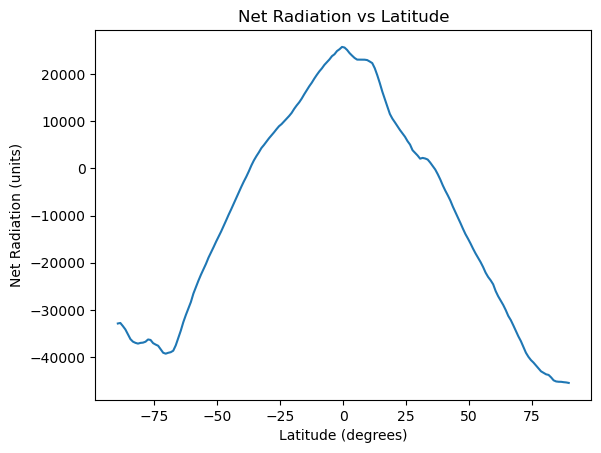

In [29]:
plt.plot(ds_subset['lat'], net_radiation.mean(dim='time')) 
plt.xlabel('Latitude (degrees)')
plt.ylabel('Net Radiation (units)')
plt.title('Net Radiation vs Latitude')
plt.show()

In [30]:
#4
low_cloud_area = ds['cldarea_total_daynight_mon'] <= 25
high_cloud_area = ds['cldarea_total_daynight_mon'] >= 75

In [31]:
toa_sw_low_cloud = (ds['toa_sw_all_mon'].where(low_cloud_area)).mean(dim='time')
toa_sw_high_cloud = (ds['toa_sw_all_mon'].where(high_cloud_area)).mean(dim='time')

In [32]:
toa_lw_low_cloud = (ds['toa_lw_all_mon'].where(low_cloud_area)).mean(dim='time')
toa_lw_high_cloud = (ds['toa_lw_all_mon'].where(high_cloud_area)).mean(dim='time')

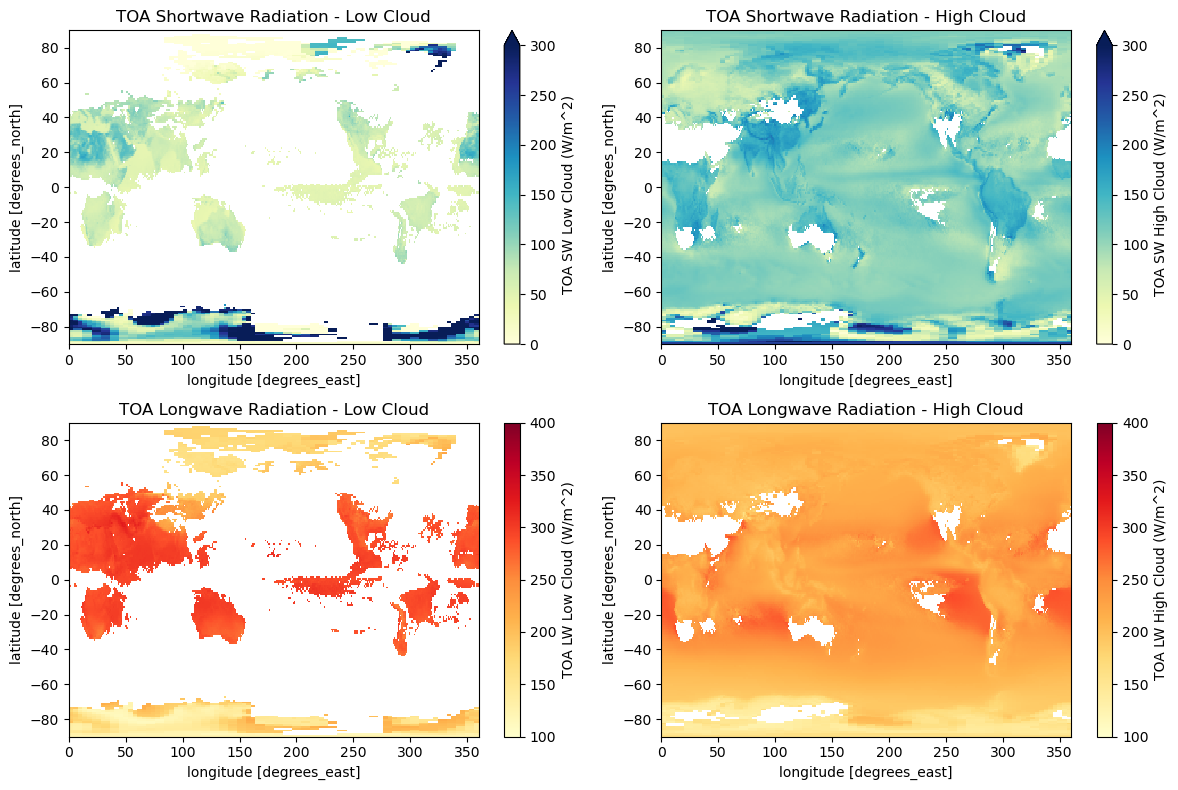

In [33]:

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
toa_sw_low_cloud.plot(cmap='YlGnBu', vmin=0, vmax=300, cbar_kwargs={'label': 'TOA SW Low Cloud (W/m^2)'})
plt.title('TOA Shortwave Radiation - Low Cloud')

plt.subplot(2, 2, 2)
toa_sw_high_cloud.plot(cmap='YlGnBu', vmin=0, vmax=300, cbar_kwargs={'label': 'TOA SW High Cloud (W/m^2)'})
plt.title('TOA Shortwave Radiation - High Cloud')

plt.subplot(2, 2, 3)
toa_lw_low_cloud.plot(cmap='YlOrRd', vmin=100, vmax=400, cbar_kwargs={'label': 'TOA LW Low Cloud (W/m^2)'})
plt.title('TOA Longwave Radiation - Low Cloud')

plt.subplot(2, 2, 4)
toa_lw_high_cloud.plot(cmap='YlOrRd', vmin=100, vmax=400, cbar_kwargs={'label': 'TOA LW High Cloud (W/m^2)'})
plt.title('TOA Longwave Radiation - High Cloud')

plt.tight_layout()
plt.show()


In [34]:

low_cloud_area = ds['cldarea_total_daynight_mon'] <= 25
high_cloud_area = ds['cldarea_total_daynight_mon'] >= 75

global_mean_sw_low_cloud = ds['toa_sw_all_mon'].where(low_cloud_area).mean(dim=('lat', 'lon', 'time'))
global_mean_sw_high_cloud = ds['toa_sw_all_mon'].where(high_cloud_area).mean(dim=('lat', 'lon', 'time'))
global_mean_lw_low_cloud = ds['toa_lw_all_mon'].where(low_cloud_area).mean(dim=('lat', 'lon', 'time'))
global_mean_lw_high_cloud = ds['toa_lw_all_mon'].where(high_cloud_area).mean(dim=('lat', 'lon', 'time'))

global_mean_sw = ds['toa_sw_all_mon'].mean(dim=('lat', 'lon', 'time'))
global_mean_lw = ds['toa_lw_all_mon'].mean(dim=('lat', 'lon', 'time'))

print("Global Mean Shortwave Radiation (W/m^2):")
print("  Overall:", global_mean_sw.values)
print("  Low Cloud Region:", global_mean_sw_low_cloud.values)
print("  High Cloud Region:", global_mean_sw_high_cloud.values)

print("\nGlobal Mean Longwave Radiation (W/m^2):")
print("  Overall:", global_mean_lw.values)
print("  Low Cloud Region:", global_mean_lw_low_cloud.values)
print("  High Cloud Region:", global_mean_lw_high_cloud.values)


Global Mean Shortwave Radiation (W/m^2):
  Overall: 102.30436
  Low Cloud Region: 97.11116
  High Cloud Region: 111.76594

Global Mean Longwave Radiation (W/m^2):
  Overall: 224.7552
  Low Cloud Region: 247.33109
  High Cloud Region: 215.39049


### 第二题代码运行正常，可以输出结果和图片，报告中也展示了代码思路。第一问公式错误导致计算能量不守恒，应该是入射减去辐射：c-a-b；第二问思路正确但应该计算三个维度的平均值不只是经纬度，但修改后结果仍然有差异，可能是计算网格面积权重公式错误；第三问量级偏小，计算出total amount总量，这里面涉及到了计算不同维度下的grid面积，最后辐射强度要跟面积相乘，单位：W。
### 得分：27/30
### --------------------------------------------------------------------------------------------

## 3. Explore a netCDF dataset

# 作业3

In [35]:
data = xr.open_dataset("CMS_Lake_Huron_PP_Yearly_2010-2013.nc", engine="netcdf4")
data

<xarray.Dataset>
Dimensions:      (time: 4, time_bounds: 2, latitude: 360, longitude: 512)
Coordinates:
  * time         (time) datetime64[ns] 2010-01-01 2011-01-01 ... 2013-01-01
    time_bounds  (time, time_bounds) datetime64[ns] ...
  * latitude     (latitude) float32 46.59 46.58 46.57 46.56 ... 43.02 43.01 43.0
  * longitude    (longitude) float32 -84.76 -84.75 -84.74 ... -79.66 -79.65
Data variables:
    app          (time, latitude, longitude) float32 ...
Attributes: (12/25)
    instrument:                     MODIS
    platform:                       Aqua
    date_created:                   2018-12-03T21:29:00Z
    creator_name:                   Gary Fahnenstiel
    contact_name:                   Michael Sayers
    contact_email:                  mjsayers@mtu.edu
    ...                             ...
    description:                    Average annual primary production of carb...
    units:                          mg/m^2/day
    NorthnmostLatitude:             46.591
    WesternmostLongitude:           -84.762
    SouthernmostLatitude:           43.001
    EasternmostLongitude:           -79.652

In [36]:
variables = data.variables
print("All variables in the file:")
print(variables)

All variables in the file:
Frozen({'time': <xarray.IndexVariable 'time' (time: 4)>
array(['2010-01-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2012-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    bounds:   time_bounds, 'time_bounds': <xarray.Variable (time: 4, time_bounds: 2)>
[8 values with dtype=datetime64[ns]], 'latitude': <xarray.IndexVariable 'latitude' (latitude: 360)>
array([46.591, 46.581, 46.571, ..., 43.021, 43.011, 43.001], dtype=float32)
Attributes:
    units:      degrees_north
    long_name:  latitude, 'longitude': <xarray.IndexVariable 'longitude' (longitude: 512)>
array([-84.762, -84.752, -84.742, ..., -79.672, -79.662, -79.652],
      dtype=float32)
Attributes:
    units:      degrees_east
    long_name:  longitude, 'app': <xarray.Variable (time: 4, latitude: 360, longitude: 512)>
[737280 values with dtype=float32]
Attributes:
    units:      mg/m^2/day
    long_name:  Yearly Average Primar

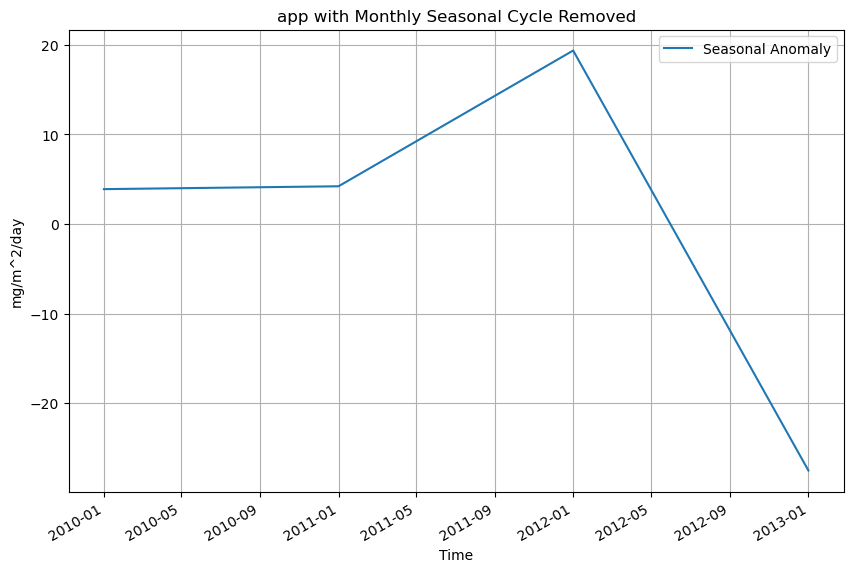

In [37]:
variable_name = 'app'
variable_data = data[variable_name]

monthly_mean = variable_data.resample(time='1M').mean()

monthly_climatology = variable_data.groupby('time.month').mean(dim='time')

anomaly = variable_data.groupby('time.month') - monthly_climatology

plt.figure(figsize=(10, 6))
anomaly.mean(dim=('latitude', 'longitude')).plot(label='Seasonal Anomaly')

plt.title(f'{variable_name} with Monthly Seasonal Cycle Removed')
plt.xlabel('Time')
plt.ylabel(variable_data.units)  
plt.legend()
plt.grid(True)
plt.show()


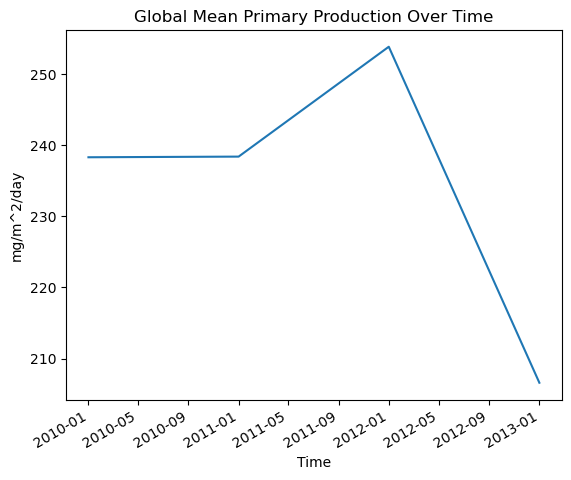

In [38]:
#2全球平均时间序列图
global_mean = data['app'].mean(dim=('latitude', 'longitude'))
global_mean.plot()
plt.title('Global Mean Primary Production Over Time')
plt.xlabel('Time')
plt.ylabel(data['app'].units)
plt.show()

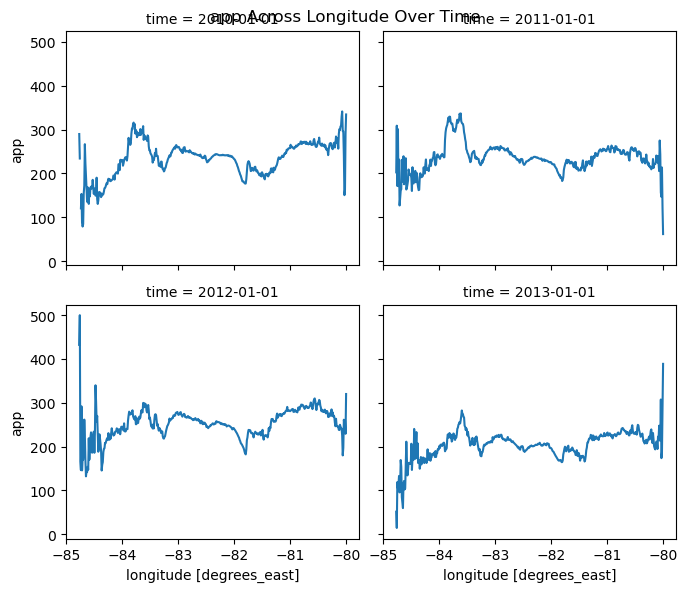

In [39]:
#经度-时间图：
variable_data.mean(dim='latitude').plot(x='longitude', col='time', col_wrap=2)
plt.suptitle(f'{variable_name} Across Longitude Over Time')
plt.show()

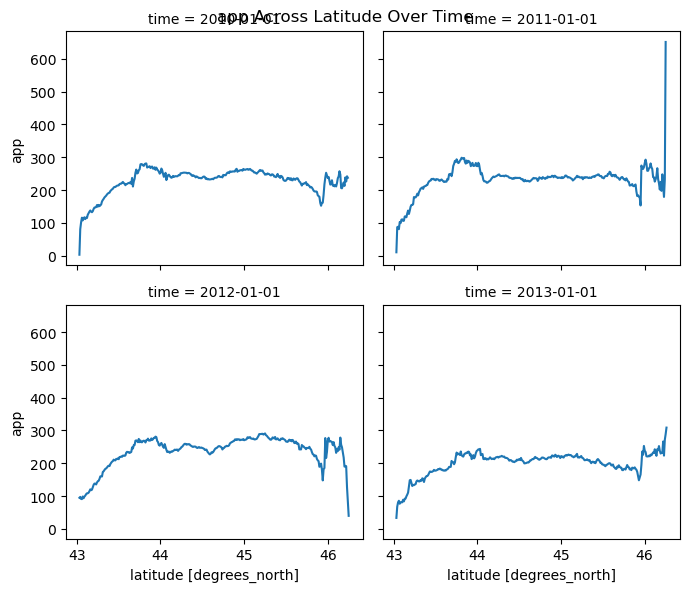

In [40]:
#纬度-时间图
variable_data.mean(dim='longitude').plot(x='latitude', col='time', col_wrap=2)
plt.suptitle(f'{variable_name} Across Latitude Over Time')
plt.show()

/home/zhangp/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


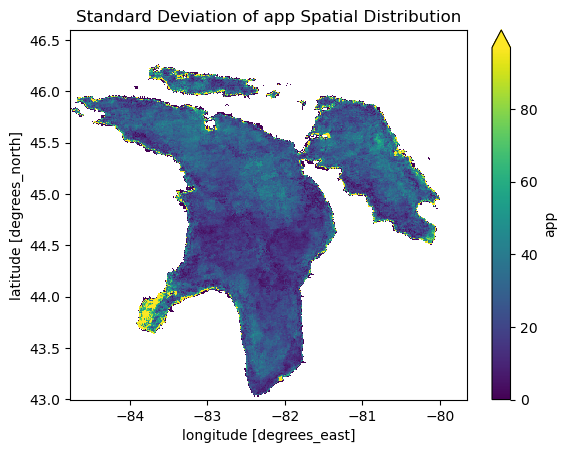

In [41]:
#经纬度标准差热图
variable_data.std(dim='time').plot(x='longitude', y='latitude', robust=True)
plt.title(f'Standard Deviation of {variable_name} Spatial Distribution')
plt.show()

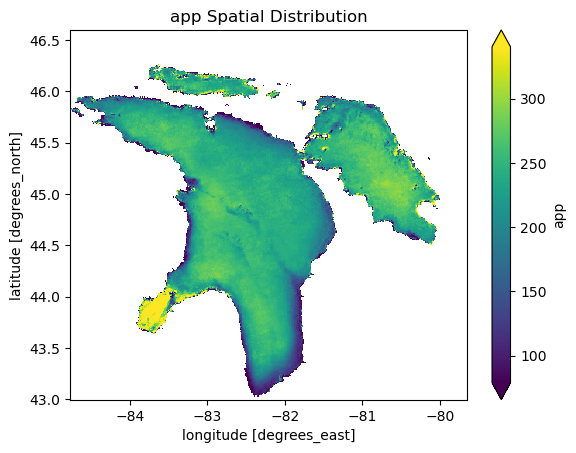

In [42]:
#经纬度热图
variable_data.mean(dim='time').plot(x='longitude', y='latitude', robust=True)
plt.title(f'{variable_name} Spatial Distribution')
plt.show()

### 第三题代码运行正常，可以输出正确结果和图片，报告中也展示了输出内容和结果。但第二问2.3两张图片大标题与小标题重合
### 得分：9/10
### --------------------------------------------------------------------------------------------